In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

import missingno as msno    # 누락값 표시
import warnings
import mglearn
warnings.filterwarnings('ignore')  # 워닝 무시
from sklearn.model_selection import train_test_split
%matplotlib inline

### 원 핫 인코딩

In [ ]:
data = pd.read_csv(r'C:\Users\ija06\OneDrive\바탕 화면\파이썬 라이브러리를 활용한 머신러닝\mglearn\adult.data',
header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'occupation',
'hours-per-week','income']]
data['education'].value_counts()

In [ ]:
# 원핫 인코딩
data_dummies = pd.get_dummies(data)
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('{:.2f}'.format(logreg.score(X_test, y_test)))

#### 구간 분할

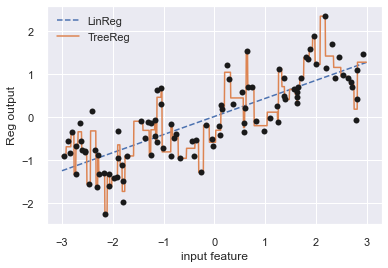

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1) # X_test
reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='LinReg') 
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label='TreeReg') 

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Reg output')
plt.xlabel('input feature')
plt.legend(loc='best')

In [ ]:
# 구간 분할(bining)

bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

In [ ]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [ ]:
# 인코딩 후 다시 모델링하기

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='binned LinReg')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='binned Tree')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Reg output')
plt.xlabel('input Feature')

### 상호작용 추가하기

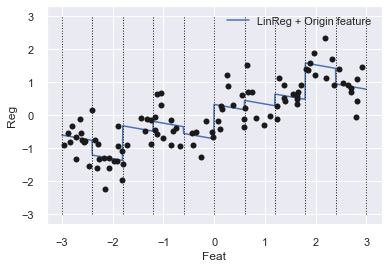

In [21]:
# 구간특성(10) + 원본특성(1)
X_combined = np.hstack([X,X_binned])
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='LinReg + Origin feature')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')
plt.plot(X[:,0], y, 'o', c='k')

Text(0.5, 0, 'Feat')

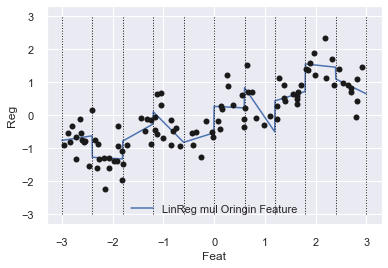

In [41]:
# 구간특성 + (구간특성*원래특성)

X_product = np.hstack([X_binned, X * X_binned])
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='LinReg mul Oringin Feature')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k', linewidth=1)

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')


### 다항식 추가하기

#### 다항식 추가 선형 모델 VS svm

In [26]:
from sklearn.preprocessing import PolynomialFeatures
# x**10까지 고차항을 추가한다.
# 기본값인 'include_bias=True'는 절편을 위해 값이 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

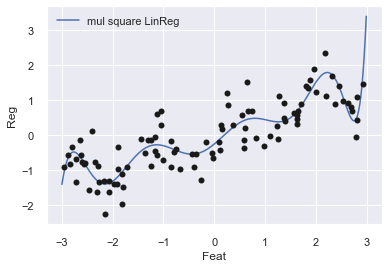

In [29]:
# 다항식을 추가한 선형 회귀
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='mul square LinReg')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')
plt.plot(X[:,0], y, 'o', c='k')

Text(0.5, 0, 'Feat')

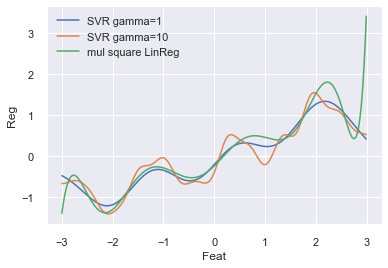

In [37]:
# 원본특성의 svm 모델 vs  다항식 선형 모델
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(line, reg.predict(line_poly), label='mul square LinReg')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')

#### 보스턴 주택 가격 데이터셋에 적용하기

In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

#데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# 다항식 특성 추가하기
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('\n{}'.format(poly.get_feature_names()))


['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [54]:
# Ridge로 비교하기(원본 특성 vs 다항식 추가)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('{:.2f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print('{:.2f}'.format(ridge.score(X_test_poly, y_test)))

0.62
0.75


### 일변량 비선형 변환

In [140]:
# 카운트 데이터 만들기
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
y = np.dot(X_org, w) # (1000 X 3)*(3 X 1) = (1000 X 1) array

# 푸아송 분포의 데이터 만들기
X = rnd.poisson(10*np.exp(X_org))
'\n{}'.format(np.bincount(X[:,0]))

# X[0]의 히스토그램
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='blue')


'\n[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9\n 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5\n  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1\n  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0\n  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0\n  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]'

0.622


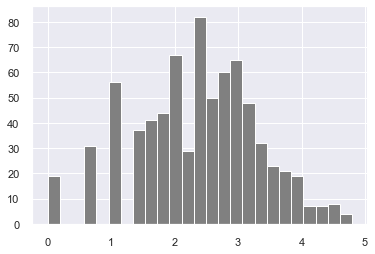

0.875


In [148]:
# X에 Ridge 회귀 적용하기
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('{:.3f}'.format(score))

# X를 log 스케일로 변환하기
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1) 
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.show()

# 다시 Ridge 적용하기
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('{:.3f}'.format(score))

### 특성 자동 선택

#### 일변량 통계(univariate statistics)

#### 모델 기반 선택(model-based selection)

#### 반복적 선택(iterative selection)